In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


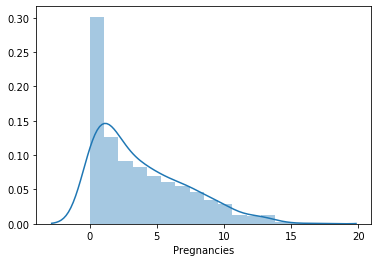

In [5]:
sns.distplot(df.Pregnancies)

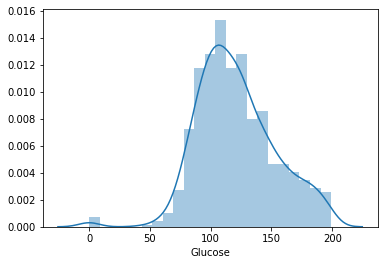

In [6]:
sns.distplot(df.Glucose)

In [7]:
df.describe().T
col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

Here some of the values have zero attributes when they technically shouldn't. Like Glucose levels, BP, BMI etc. So, we should replace the zero values with NAN for cleaning.

In [8]:
df[col] = df[col].replace(0,np.NAN)

In [9]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Insulin seems to be almost half empty. Lets see if we can delete it.

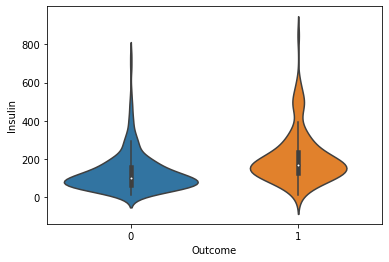

In [10]:
sns.violinplot(y=df.Insulin,x = df.Outcome)

We will check if after imputation, will it be useful to us?
But before messing with the data, it's better to split the data first.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['Outcome'],axis = 1)
y = df.Outcome

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [14]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

Now we can move on to imputing values for NaN

In [15]:
for c in ['Glucose','BloodPressure']:
    train_X[c].fillna(train_X[c].mean(),inplace = True)
    test_X[c].fillna(test_X[c].mean(),inplace = True)

C:\Users\91891\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
for c in ['SkinThickness','Insulin','BMI']:
    train_X[c].fillna(train_X[c].median(),inplace = True)
    test_X[c].fillna(test_X[c].median(),inplace = True)

In [17]:
train_X.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [18]:
dummy = train_y
dummy.columns = ['Outcome']
train_XY = pd.concat([train_X,dummy],axis = 1,sort = False)

In [19]:
dummy.head()

353    0
711    0
373    0
46     0
682    0
Name: Outcome, dtype: int64

As you can see, we have replaced the NaN values and now the data looks more clean

Now for Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sss = StandardScaler().fit(train_X)

In [21]:
newcol = list(train_X.columns)
newcol

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [22]:
strain_X = pd.DataFrame(sss.transform(train_X),columns = newcol)

In [23]:
strain_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-1.057533,-0.827187,-1.918187,-1.203361,-0.769694,0.310794,-0.792169
1,0.356576,0.143389,0.477329,-0.229874,-1.470195,-0.417714,-0.116439,0.561034
2,-0.549372,-0.557149,-1.153315,1.233330,-0.555335,0.359576,-0.764862,-0.707594
3,-0.851355,0.810568,-1.316380,-0.004766,-0.161437,-0.403048,0.262314,-0.369293
4,-1.153338,-0.890739,-0.664122,1.120776,-0.415565,1.782163,-0.337630,-0.961320


In [24]:
stest_X = pd.DataFrame(sss.transform(test_X),columns = newcol)

In [25]:
stest_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.960541,1.244234,-0.664122,-0.004766,-0.180497,-0.740363,-0.555791,0.561034
1,1.866489,-1.791430,2.760232,-0.680091,-1.127122,0.447571,-0.583061,1.153060
2,-0.549372,0.009953,0.314265,-0.229874,0.791541,0.506235,0.016882,-0.623019
3,0.960541,-0.256919,-0.664122,-0.004766,-0.180497,-0.740363,0.771356,0.053583
4,-0.549372,-1.591277,0.109286,-0.004766,-0.180497,-0.095065,-1.137554,-0.961320


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**M Phase**

In [27]:
svc = SVC(kernel = 'rbf')
knc = KNeighborsClassifier()

In [28]:
svc.fit(strain_X,train_y)
knc.fit(strain_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
from sklearn.metrics import f1_score

In [30]:
svcpre = svc.predict(stest_X)
kncpre = knc.predict(stest_X)

In [31]:
get = [f1_score(test_y,svcpre),f1_score(test_y,kncpre)]

In [32]:
get

[0.6, 0.6285714285714287]

In [33]:
[f1_score(train_y,svc.predict(strain_X)),f1_score(train_y,knc.predict(strain_X))]

[0.7441860465116278, 0.7457627118644068]

Since SVM does better when using the rbf kernel, we will choose this model for now

In [34]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Time for some Hyper-Parameter tuning

In [35]:
grid = [{'C' : [1,10,100,1000],
        'kernel' : ['rbf'],
         'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        }]
svcnew = SVC()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
gs = GridSearchCV(estimator = svcnew,
                  param_grid = grid,
                 scoring = 'f1',
                 cv = 10,
                 n_jobs = -1)

In [38]:
nptrain_X = np.array(strain_X)

In [39]:
gs = gs.fit(strain_X,train_y)

C:\Users\91891\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
gs.best_score_

0.644263856491698

In [41]:
gs.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [42]:
classifier = SVC(C = 1,gamma = 0.1,kernel = 'rbf')

In [43]:
classifier.fit(strain_X,train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
pred = classifier.predict(stest_X)

In [45]:
f1 = f1_score(test_y,pred)
f1

0.5800000000000001

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtc = DecisionTreeClassifier()

In [48]:
dtc.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
pred = dtc.predict(test_X)

In [50]:
f1_score(test_y,pred)

0.47058823529411764

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()

In [53]:
rfc.fit(strain_X,train_y)

C:\Users\91891\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
pred = rfc.predict(stest_X)

In [55]:
f1_score(test_y,pred)

0.5227272727272728

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,pred)

0.6579629629629631

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbc = GradientBoostingClassifier()
gbc.fit(strain_X,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
pred = gbc.predict(stest_X)

In [60]:
f1_score(test_y,pred)

0.6262626262626262

In [61]:
grid = [{'n_estimators' : [100,1000],
         'learning_rate':[0.1,0.2,0.5]
    
}]
gbc = GradientBoostingClassifier()

In [62]:
gss = GridSearchCV(estimator = gbc,
                  param_grid = grid,
                 scoring = 'f1',
                 cv = 10,
                 n_jobs = -1)

In [63]:
gss.fit(strain_X,train_y)

C:\Users\91891\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort

In [64]:
strain_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-1.057533,-0.827187,-1.918187,-1.203361,-0.769694,0.310794,-0.792169
1,0.356576,0.143389,0.477329,-0.229874,-1.470195,-0.417714,-0.116439,0.561034
2,-0.549372,-0.557149,-1.153315,1.233330,-0.555335,0.359576,-0.764862,-0.707594
3,-0.851355,0.810568,-1.316380,-0.004766,-0.161437,-0.403048,0.262314,-0.369293
4,-1.153338,-0.890739,-0.664122,1.120776,-0.415565,1.782163,-0.337630,-0.961320


In [65]:
gbc.fit(strain_X,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
pred = gbc.predict(stest_X)

In [67]:
f1_score(test_y,pred)

0.631578947368421

In [68]:
gbc.fit(strain_X,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
f1_score(test_y,gbc.predict(stest_X))

0.6262626262626262

In [71]:
import pickle

In [72]:
pkl_filename = "gradientboost.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gbc, file)